In [1]:
library(dplyr)
library(tidyverse)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.0.6     ✔ stringr 1.4.0
✔ tidyr   1.1.2     ✔ forcats 0.5.1
✔ readr   1.4.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



The purpose of this Jupyter Notebook is to showcase my skills in R. Here, I attempt to generate the bar plot from one of my capstone projects, https://github.com/Fryman93/Capstone_2_Sepsis/blob/master/Sepsis.ipynb. 


The bar plot, found by In[4], shows count frequency of the time interval in which the patients get diagnosed with Sepsis. Here, instead of including all 5000 patients, I only consider the first 500 to speed up the processing.

In [2]:
setwd('/Users/lucasfriedman/Desktop/R/training')

In [3]:
patient_files <- list.files('/Users/lucasfriedman/Desktop/R/training', pattern = '.psv')

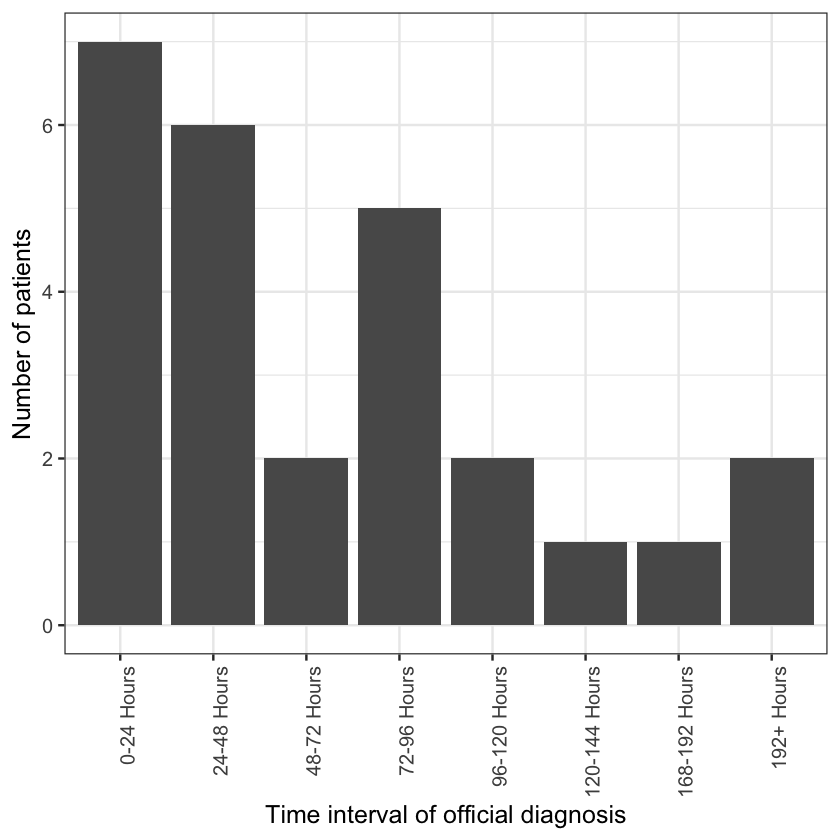

In [4]:
# Goal is to recreate the Bar Plot shown in In[4]

patient_psvs <- list()
patient_id <- 1
i <- 1

for (file in patient_files[1:500]){
    patient <- read_delim(file, delim = "|", col_types = cols())
    # Create unique patient_id
    patient$patient_id <- patient_id
    
    # Create list of dataframes
    patient_psvs[[i]] <- patient
    
    patient_id <- patient_id + 1
    i <- i + 1
}

# Concat all dataframes into a single dataframe
master <- do.call("rbind", patient_psvs) %>%
          
          # Show only rows where SepsisLabel = 1
          filter(SepsisLabel == 1) %>%

          # Group by patient_id
          group_by(patient_id) %>%

          # Get the minimum ICULOS
          slice(which.min(ICULOS))

# Bucket the column that dictates the hour in which the patient gets diagnosed in 24-hour intervals
master$first_hour <- cut(master$ICULOS, 
                         breaks = c(0, 24, 48, 72, 96, 120, 144, 168, 192, 1000),
                         labels = c('0-24 Hours', '24-48 Hours', '48-72 Hours', '72-96 Hours', 
                                    '96-120 Hours', '120-144 Hours', '144-168 Hours', 
                                    '168-192 Hours', '192+ Hours'))
ggplot(master, aes(x=first_hour)) + 
geom_bar() + 
xlab('Time interval of official diagnosis') +
ylab('Number of patients') + 
theme_bw(base_size=15) + 
theme(axis.text.x = element_text(angle = 90, hjust = 1))